# Train your first neural network: basic classification

In [ ]:
from __future__ import absolute_import, division,print_function,unicode_literals

### TensorFlow and tf.keras

In [2]:
import tensorflow as tf
from tensorflow import keras

### Helper libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.8.0


### Import the fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
#train_images[1]

In [10]:
#%matplotlib inline
#import matplotlib.image as mpimg
#imgplot = plt.imshow(train_images[1])

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

### Preprocess the data

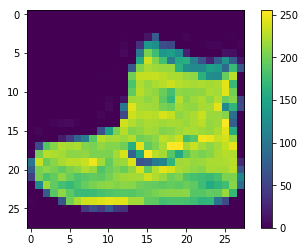

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

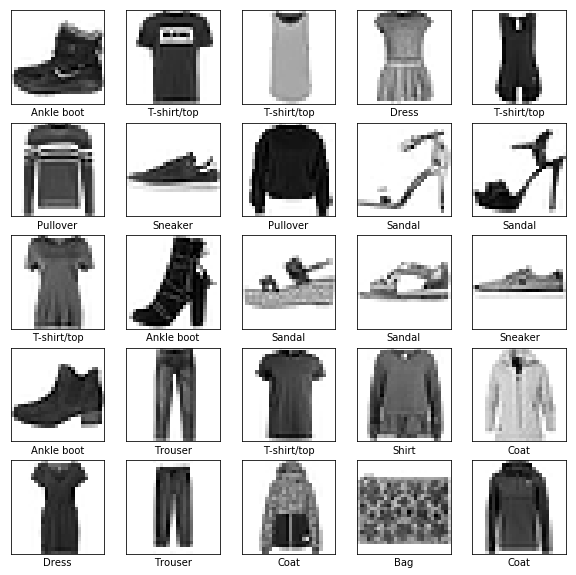

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

## Build the model

### setup the layers

In [16]:
model =  keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128,activation = tf.nn.relu),
                           keras.layers.Dense(128,activation = tf.nn.relu),
                          keras.layers.Dense(10,activation = tf.nn.softmax)])

### Compile the model

In [17]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Train the model

In [32]:
model.fit(train_images,train_labels,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 8s 137us/step - loss: 0.3609 - acc: 0.8673
Epoch 2/2
60000/60000 [==============================] - 8s 141us/step - loss: 0.3273 - acc: 0.8793


### Evaluate accuracy

In [19]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - ETA:  - 1s 60us/step
Test accuracy: 0.8531


### Make predictions

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([5.8476362e-05, 1.1071684e-06, 1.0710957e-05, 1.6538828e-05,
       1.4355007e-05, 4.9768649e-02, 9.1844748e-05, 1.3141032e-01,
       1.0400383e-03, 8.1758797e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img  =predictions_array[i],true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                          color = color)
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
        

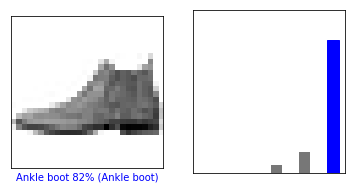

In [25]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

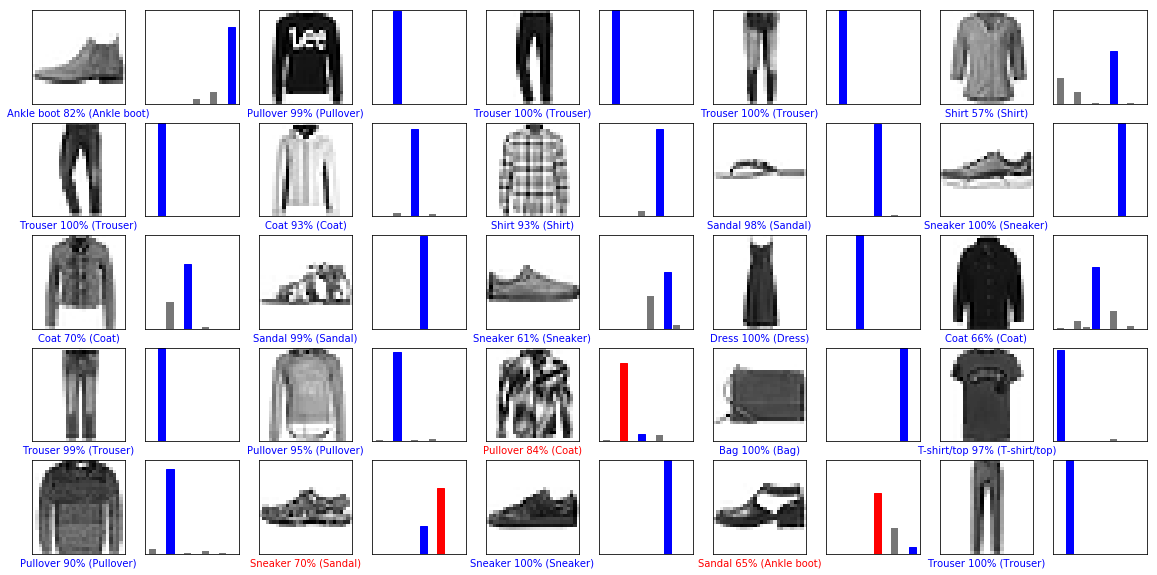

In [26]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

In [27]:
image_no = 0
img = test_images[image_no]
print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.8476413e-05 1.1071684e-06 1.0710968e-05 1.6538828e-05 1.4355020e-05
  4.9768656e-02 9.1844748e-05 1.3141032e-01 1.0400389e-03 8.1758797e-01]]


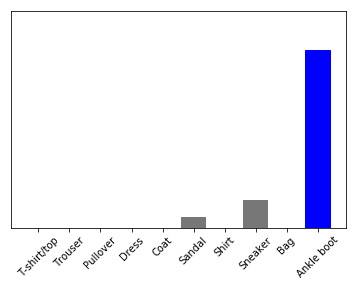

In [30]:

plot_value_array(0,predictions_single,test_labels)
plt.xticks(range(10),class_names,rotation = 45)
plt.show()

In [31]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
